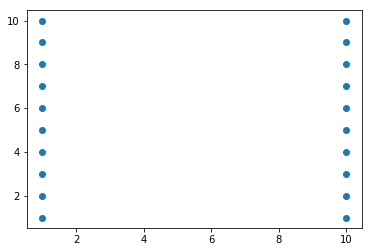

In [11]:
import numpy as np
import matplotlib.pyplot as plot

numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], 
              [1, 6], [1, 7], [1, 8],[1, 9], [1, 10], 
              [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], 
              [10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])
plot.scatter(numarray[:, 0], numarray[:, 1])
plot.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], 
              [1, 6], [1, 7], [1, 8],[1, 9], [1, 10], 
              [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], 
              [10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])

clusters = KMeans(n_clusters = 2)
clusters.fit(numarray)
print(clusters.labels_)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


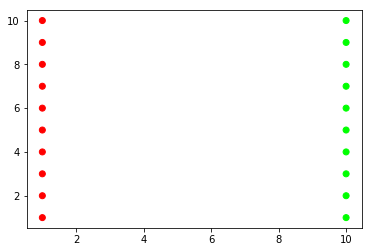

In [19]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], 
              [1, 6], [1, 7], [1, 8],[1, 9], [1, 10], 
              [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], 
              [10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])

clusters = KMeans(n_clusters = 2)
clusters.fit(numarray)
colors = ["#ff0000", "#00ff00"]

colorlist = []
for i in range(len(clusters.labels_)):
    colorlist.append(colors[clusters.labels_[i]])
    
plot.scatter(numarray[:, 0], numarray[:, 1], c=colorlist)
plot.show()

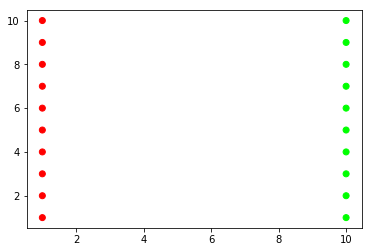

In [4]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], 
              [1, 6], [1, 7], [1, 8],[1, 9], [1, 10], 
              [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], 
              [10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])

clusters = KMeans(n_clusters = 2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00"])
    
plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

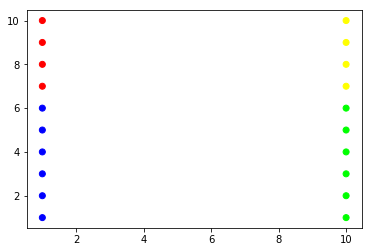

In [2]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], 
              [1, 6], [1, 7], [1, 8],[1, 9], [1, 10], 
              [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], 
              [10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])

clusters = KMeans(n_clusters = 4, n_init=2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])
    
plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

In [5]:
from pandas.io.json import json_normalize
import pandas as pd
import json

data = json.load(open('progStatementCount.json'))
dataframe = json_normalize(data)
paradigmsCount = dataframe.loc[:,'count':'paradigmLabel']

clusters = KMeans(n_clusters = 4, n_init=2)
clusters.fit(paradigmsCount)


ValueError: could not convert string to float: 'declarative programming'

In [3]:
from pandas.io.json import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import json

data = json.load(open('progStatementCount.json'))
dataframe = json_normalize(data)

le = LabelEncoder()
dataframe['paradigmLabelInt'] = le.fit_transform(dataframe['paradigmLabel'])
print(dataframe)

    count                  paradigmLabel  \
0      55              array programming   
1      48         imperative programming   
2      51         imperative programming   
3      51         procedural programming   
4      51         procedural programming   
5      52    object-oriented programming   
6     121        declarative programming   
7      55              logic programming   
8      60        declarative programming   
9     116                 query language   
10     74            concept programming   
11     74     multi-paradigm programming   
12     38           concurrent computing   
13     55         procedural programming   
14     68        declarative programming   
15     68           semi-structured data   
16     76    object-oriented programming   
17     76              array programming   
18    114         imperative programming   
19    114         functional programming   
20    114        declarative programming   
21    114    object-oriented pro

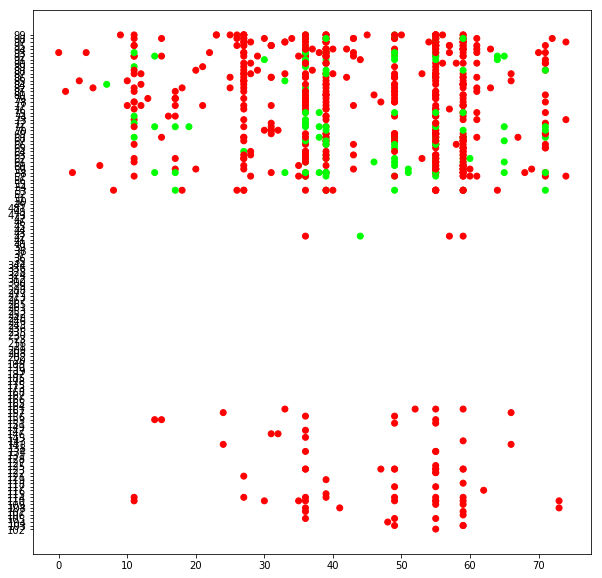

In [68]:
from pandas.io.json import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import json

data = json.load(open('progStatementCount.json'))
dataframe = json_normalize(data)

le = LabelEncoder()
dataframe['paradigmLabelInt'] = le.fit_transform(dataframe['paradigmLabel'])
paradigmsCount = dataframe[['count','paradigmLabelInt']]

clusters = KMeans(n_clusters = 2)
clusters.fit(paradigmsCount)
colors = ["#ff0000", "#00ff00", "#0000ff", "#ffff00"]

colorlist = []
for i in range(len(clusters.labels_)):
    colorlist.append(colors[clusters.labels_[i]])
    

plot.rcParams['figure.figsize'] = [10, 10]
plot.scatter(paradigmsCount['paradigmLabelInt'], paradigmsCount['count'], c=colorlist)
plot.show()

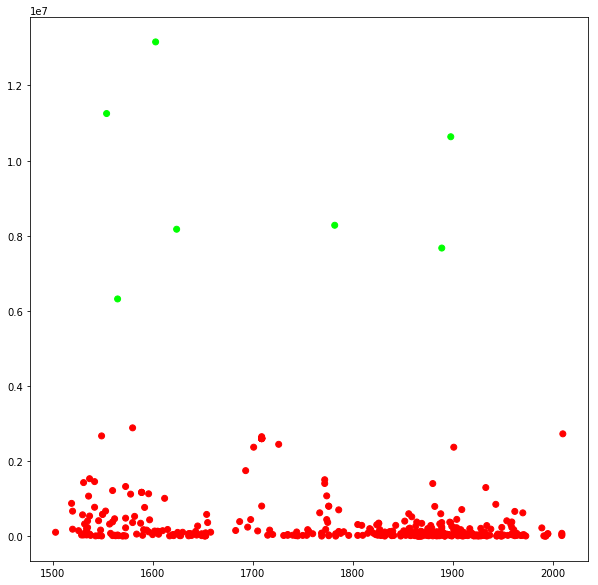

In [5]:
from pandas.io.json import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plot

import numpy as np
from sklearn.cluster import KMeans
import json

data = json.load(open('citypopulation.json'))
dataframe = json_normalize(data)
#print(dataframe)

le = LabelEncoder()
dataframe['cityLabel'] = le.fit_transform(dataframe['cityLabel'])
dataframe = dataframe.astype(dtype= {"year":"<i4", "cityLabel":"<U200", "population":"i"})
dataframe = dataframe.loc[dataframe['year'] > 1500]
#dataframe = dataframe.loc[dataframe['population'] < 700000]
yearPopulation = dataframe[['year', 'population']]


clusters = KMeans(n_clusters = 2, n_init=1000)
clusters.fit(yearPopulation.values)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])
   

plot.rcParams['figure.figsize'] = [10, 10]
plot.scatter(yearPopulation['year'], yearPopulation['population'], c=colors[clusters.labels_])
plot.show()